In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
# Cargar los datos de Amazon UK en un DataFrame
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  

1. Creación de la tabla cruzada

In [3]:
import pandas as pd

# Supongamos que los datos están almacenados en un DataFrame llamado df con las columnas 'product_category' y 'isBestSeller'
df['isBestSeller'] = df['isBestSeller'].astype(int)  # Si los valores son True/False, conviértelos a 1/0

cross_tab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
cross_tab['best_seller_proportion'] = cross_tab[1]  # Proporción de best-sellers por categoría

# Ordenar por proporción de best-sellers
cross_tab_sorted = cross_tab.sort_values(by='best_seller_proportion', ascending=False)
cross_tab_sorted


isBestSeller,0,1,best_seller_proportion
category,,,
Grocery,0.941865,0.058135,0.058135
Smart Home Security & Lighting,0.942308,0.057692,0.057692
Health & Personal Care,0.942314,0.057686,0.057686
Mobile Phone Accessories,0.957529,0.042471,0.042471
Power & Hand Tools,0.964661,0.035339,0.035339
...,...,...,...
"CD, Disc & Tape Players",1.000000,0.000000,0.000000
General Music-Making Accessories,1.000000,0.000000,0.000000
Snowboard Boots,1.000000,0.000000,0.000000


3. Pruebas estadísticas

In [4]:
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia para la prueba Chi-cuadrado
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")


Chi-cuadrado: 36540.20270061387
Valor p: 0.0
Grados de libertad: 295


In [5]:
import numpy as np

# Calcular la V de Cramér
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"V de Cramér: {cramers_v}")


V de Cramér: 0.1222829439760564


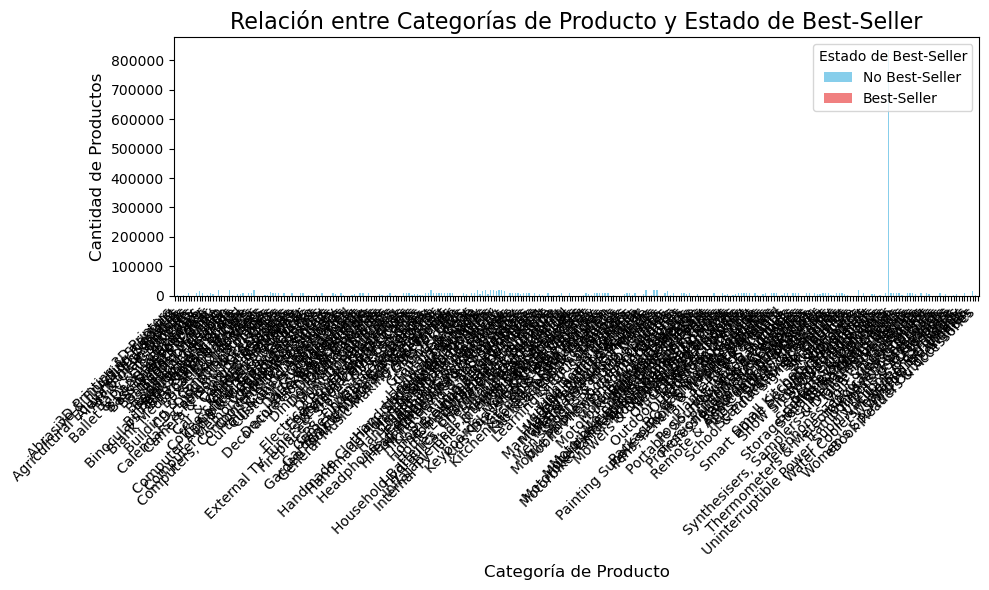

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear la tabla cruzada para contar la cantidad de productos por categoría y su estatus de best-seller
cross_tab_plot = pd.crosstab(df['category'], df['isBestSeller'])

# Crear gráfico de barras apiladas
cross_tab_plot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Personalización del gráfico
plt.title('Relación entre Categorías de Producto y Estado de Best-Seller', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Cantidad de Productos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado de Best-Seller', loc='upper right', labels=['No Best-Seller', 'Best-Seller'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Parte 2: Exploración de precios y calificaciones de productos en distintas categorías y marcas

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
# Cargar los datos de Amazon UK en un DataFrame
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  


# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) del precio
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcular el IQR (rango intercuartil)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores que estén dentro de los límites (es decir, eliminar los valores atípicos)
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


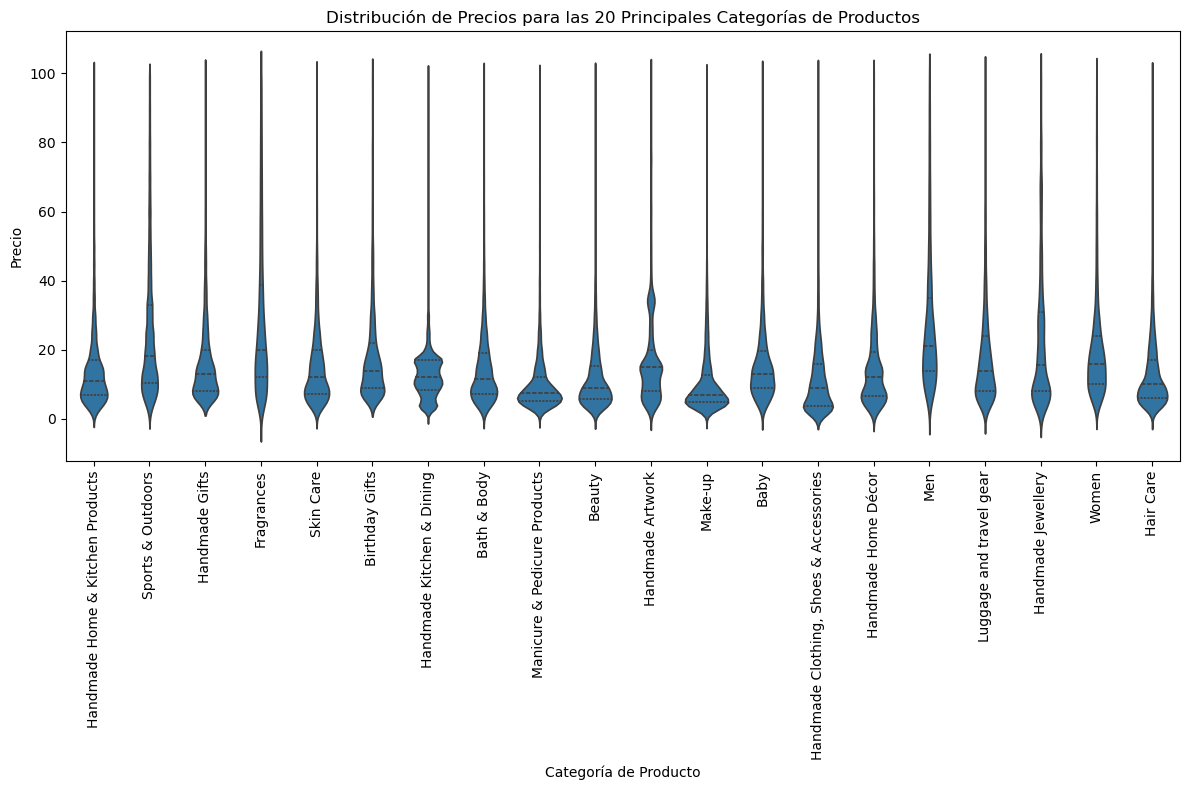

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las 20 categorías principales basadas en el recuento
top_20_categories = df_filtered['category'].value_counts().head(20).index
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

# Crear gráfico de violín
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20, inner='quartile')
plt.xticks(rotation=90)
plt.title('Distribución de Precios para las 20 Principales Categorías de Productos')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()


In [5]:
# Calcular el precio medio por categoría
mean_price_by_category = df_filtered.groupby('category')['price'].mean()

# Ordenar para encontrar la categoría con el precio medio más alto
max_mean_price_category = mean_price_by_category.idxmax()
max_mean_price = mean_price_by_category.max()

print(f"La categoría con el precio medio más alto es {max_mean_price_category} con un precio medio de {max_mean_price}.")


La categoría con el precio medio más alto es Motherboards con un precio medio de 68.77243243243242.


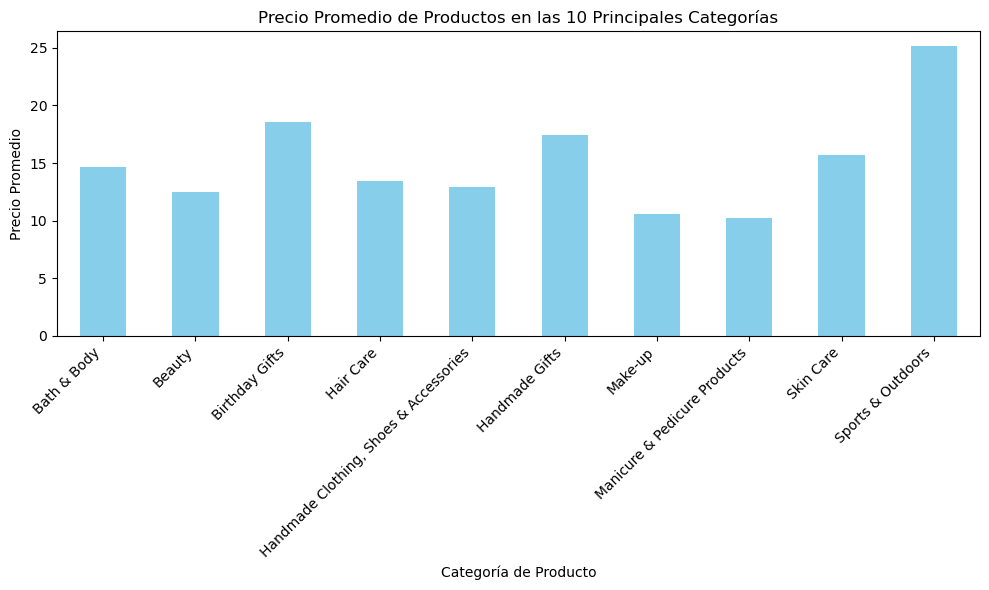

In [6]:
# Filtrar las 10 principales categorías basadas en el recuento
top_10_categories = df_filtered['category'].value_counts().head(10).index
df_top_10 = df_filtered[df_filtered['category'].isin(top_10_categories)]

# Calcular el precio promedio por categoría
avg_price_by_category = df_top_10.groupby('category')['price'].mean()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Precio Promedio de Productos en las 10 Principales Categorías')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
# Ordenar las categorías por precio promedio y encontrar la más alta
max_avg_price_category = avg_price_by_category.idxmax()
max_avg_price = avg_price_by_category.max()

print(f"La categoría con el precio promedio más alto es {max_avg_price_category} con un precio promedio de {max_avg_price}.")


La categoría con el precio promedio más alto es Sports & Outdoors con un precio promedio de 25.17206487036301.


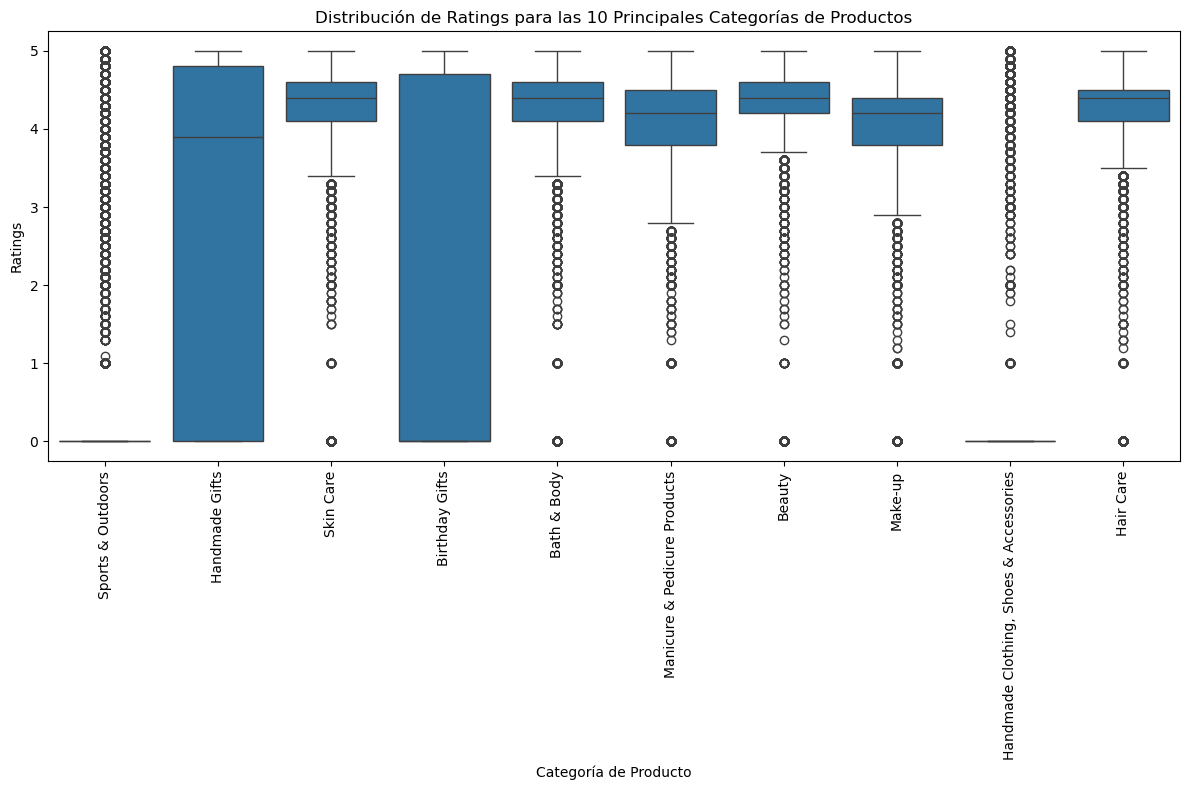

In [9]:
# Crear gráfico de caja para las 10 principales categorías
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.xticks(rotation=90)
plt.title('Distribución de Ratings para las 10 Principales Categorías de Productos')
plt.xlabel('Categoría de Producto')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()


In [10]:
# Calcular la calificación media por categoría
mean_rating_by_category = df_filtered.groupby('category')['stars'].mean()

# Encontrar la categoría con la calificación media más alta
max_mean_rating_category = mean_rating_by_category.idxmax()
max_mean_rating = mean_rating_by_category.max()

print(f"La categoría con la calificación media más alta es {max_mean_rating_category} con una calificación media de {max_mean_rating}.")


La categoría con la calificación media más alta es Luxury Food & Drink con una calificación media de 4.5441400304414.


Parte 3: Investigación de la interacción entre los precios y las calificaciones de los productos

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
# Cargar los datos de Amazon UK en un DataFrame
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  

# Calcular el coeficiente de correlación entre 'price' y 'stars'
correlation = df_filtered['price'].corr(df_filtered['stars'])
print(f"El coeficiente de correlación entre el precio y las calificaciones es: {correlation:.2f}")


El coeficiente de correlación entre el precio y las calificaciones es: -0.08


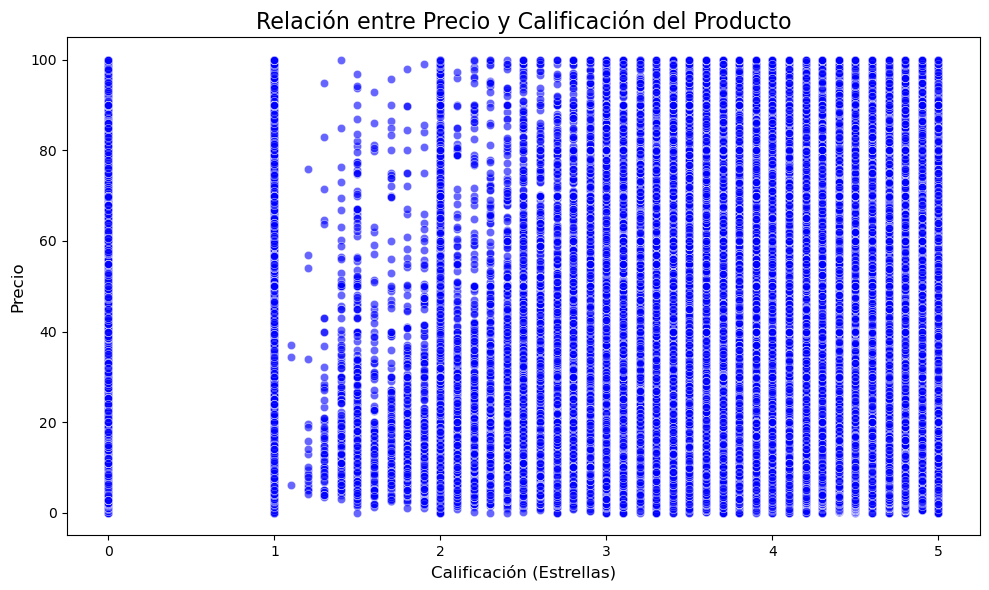

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df_filtered, alpha=0.6, color='blue')

# Personalizar el gráfico
plt.title('Relación entre Precio y Calificación del Producto', fontsize=16)
plt.xlabel('Calificación (Estrellas)', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.tight_layout()
plt.show()


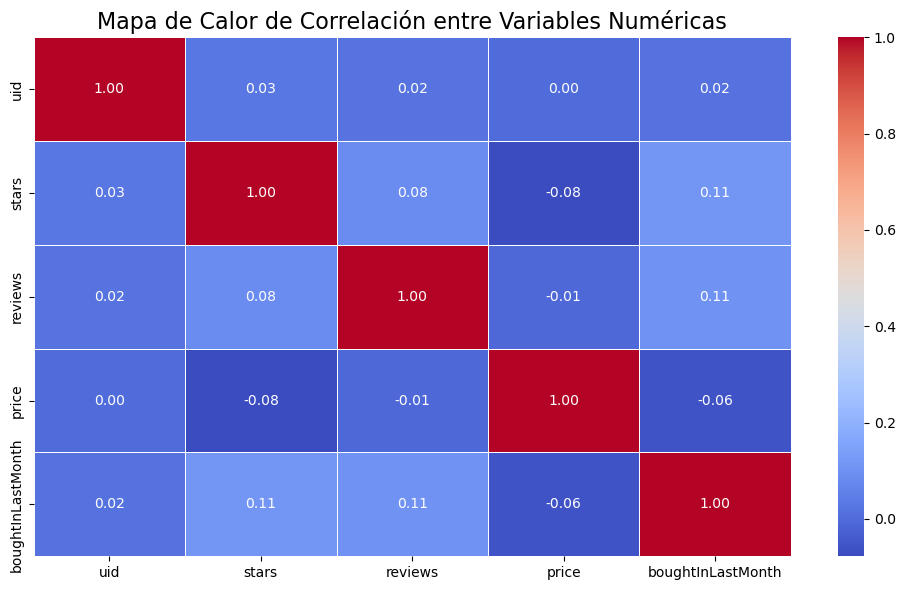

In [14]:
## Seleccionar solo las columnas numéricas
df_numeric = df_filtered.select_dtypes(include=[float, int])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor de las correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Personalización del gráfico
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()


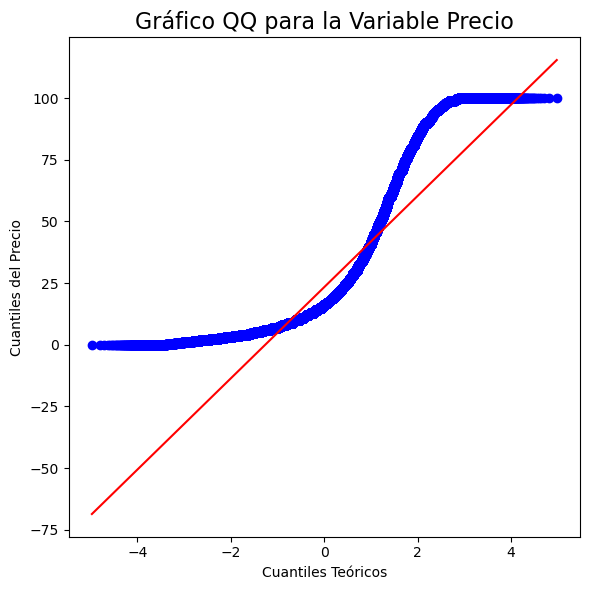

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Crear el gráfico QQ para la variable 'price'
plt.figure(figsize=(6, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)

# Personalización del gráfico
plt.title('Gráfico QQ para la Variable Precio', fontsize=16)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles del Precio')
plt.tight_layout()
plt.show()
